Analysis1

/tmp/ipykernel_53/2962669934.py:6: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


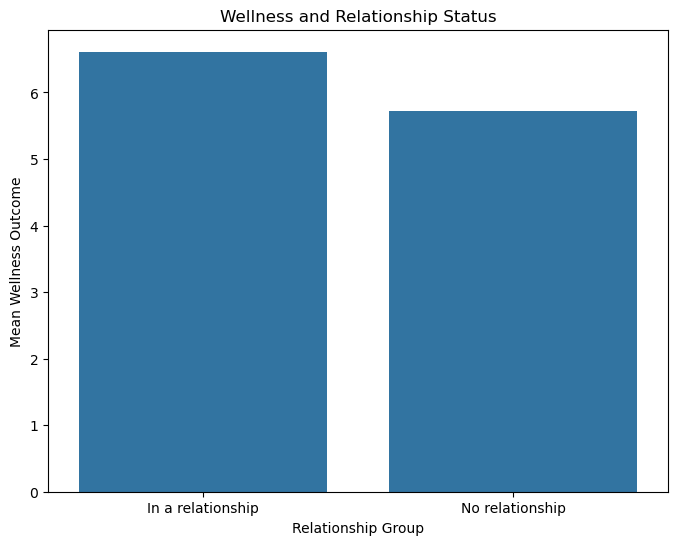

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

connection_data = df[['DEMO_relationship_status', 'WELLNESS_life_satisfaction']].dropna()
connection_data = connection_data[connection_data['DEMO_relationship_status'] != 'Presented but no response']

connection_data['Relationship_group'] = connection_data['DEMO_relationship_status'].replace({
    'In a relationship ': 'In a relationship',
    'Single and dating': 'No relationship',
    'Single and not dating': 'No relationship'
})

wellness_means = connection_data.groupby('Relationship_group')['WELLNESS_life_satisfaction'].mean().reset_index()

# Create bar plots
plt.figure(figsize=(8, 6))
sns.barplot(x='Relationship_group', y='WELLNESS_life_satisfaction', data=wellness_means)
plt.title('Wellness and Relationship Status')
plt.ylabel('Mean Wellness Outcome')
plt.xlabel('Relationship Group')
plt.show()

Analysis2

/tmp/ipykernel_52/2874169623.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


                                            count      mean      std  min  \
CONNECTION_activities_group_video_chat_pm                                   
No                                         4760.0  5.835714  2.41613  1.0   
Yes                                        4572.0  6.541557  2.18170  1.0   

                                           25%  50%  75%   max  
CONNECTION_activities_group_video_chat_pm                       
No                                         4.0  6.0  8.0  10.0  
Yes                                        5.0  7.0  8.0  10.0  


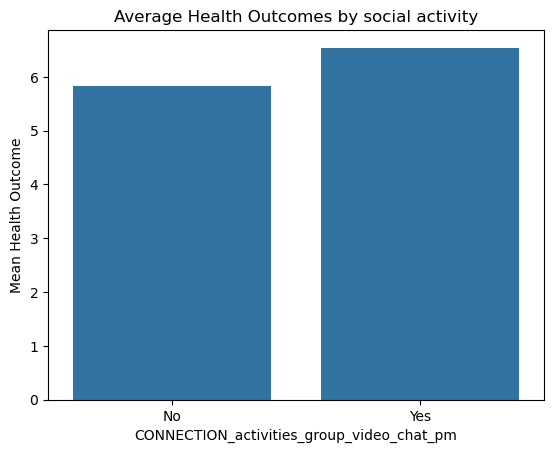

95% Confidence Interval: (0.612, 0.799)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

database2 = df[['CONNECTION_activities_group_video_chat_pm', 'WELLNESS_life_satisfaction']].dropna()
database2['WELLNESS_life_satisfaction'] = pd.to_numeric(database2['WELLNESS_life_satisfaction'], errors='coerce')
stats = database2.groupby('CONNECTION_activities_group_video_chat_pm')['WELLNESS_life_satisfaction'].describe()
print(stats)
stats_means = database2.groupby('CONNECTION_activities_group_video_chat_pm')['WELLNESS_life_satisfaction'].mean().reset_index()

# Create bar plots
sns.barplot(x='CONNECTION_activities_group_video_chat_pm', y='WELLNESS_life_satisfaction', data = stats_means)
plt.title('Average Health Outcomes by social activity')
plt.ylabel('Mean Health Outcome')
plt.show()

# bootstrapping
group1 = database2[database2['CONNECTION_activities_group_video_chat_pm'] 
                   == 'Yes']['WELLNESS_life_satisfaction']
group2 = database2[database2['CONNECTION_activities_group_video_chat_pm'] 
                   == 'No']['WELLNESS_life_satisfaction']
n_bootstraps = 10000
bootstrap_diffs = []
for _ in range(n_bootstraps):
    sample1 = np.random.choice(group1, size=len(group1), replace=True)
    sample2 = np.random.choice(group2, size=len(group2), replace=True)
    diff = np.mean(sample1) - np.mean(sample2)
    bootstrap_diffs.append(diff)
CI_lower = np.percentile(bootstrap_diffs, 2.5)
CI_upper = np.percentile(bootstrap_diffs, 97.5)
print(f"95% Confidence Interval: ({CI_lower:.3f}, {CI_upper:.3f})")

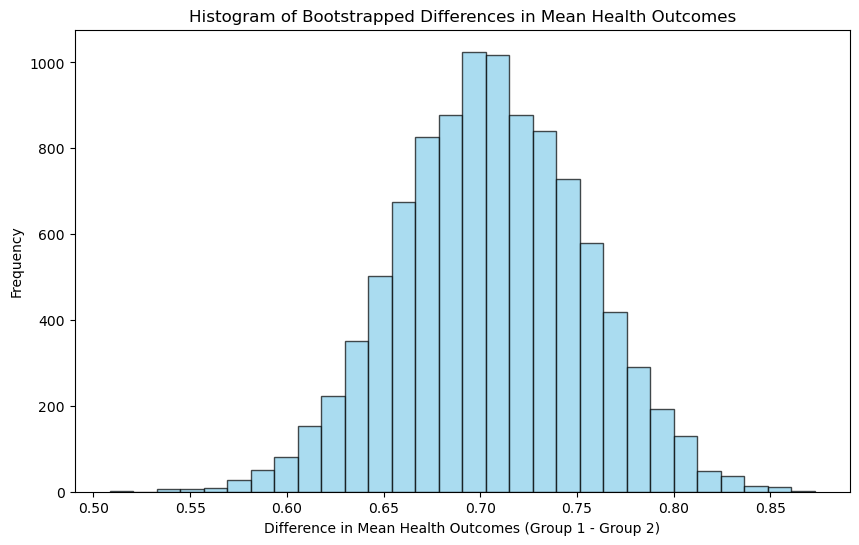

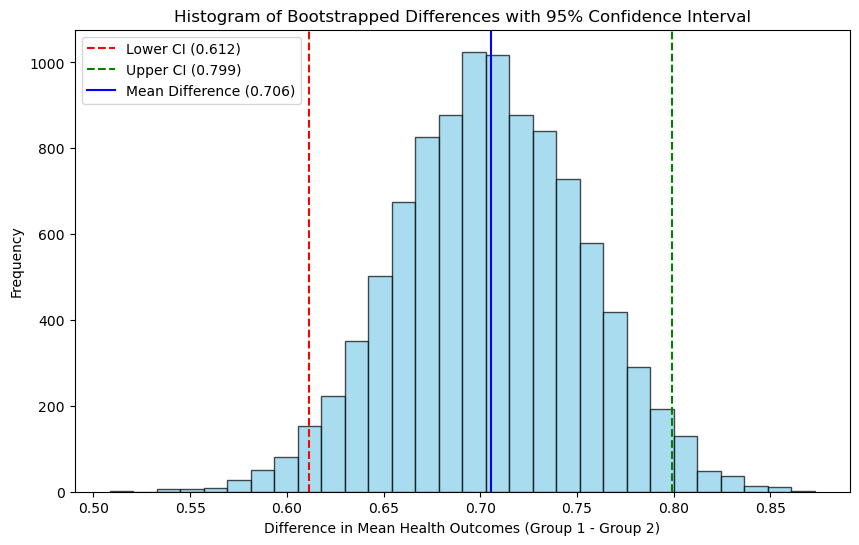

In [3]:
# First Histogram: Distribution of bootstrap differences
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrapped Differences in Mean Health Outcomes')
plt.xlabel('Difference in Mean Health Outcomes (Group 1 - Group 2)')
plt.ylabel('Frequency')
plt.show()

# Second Histogram: Annotated with 95% CI and Mean
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(CI_lower, color='red', linestyle='--', label=f'Lower CI ({CI_lower:.3f})')
plt.axvline(CI_upper, color='green', linestyle='--', label=f'Upper CI ({CI_upper:.3f})')
plt.axvline(np.mean(bootstrap_diffs), color='blue', linestyle='-', label=f'Mean Difference ({np.mean(bootstrap_diffs):.3f})')
plt.title('Histogram of Bootstrapped Differences with 95% Confidence Interval')
plt.xlabel('Difference in Mean Health Outcomes (Group 1 - Group 2)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Analysis3

/tmp/ipykernel_52/872219016.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


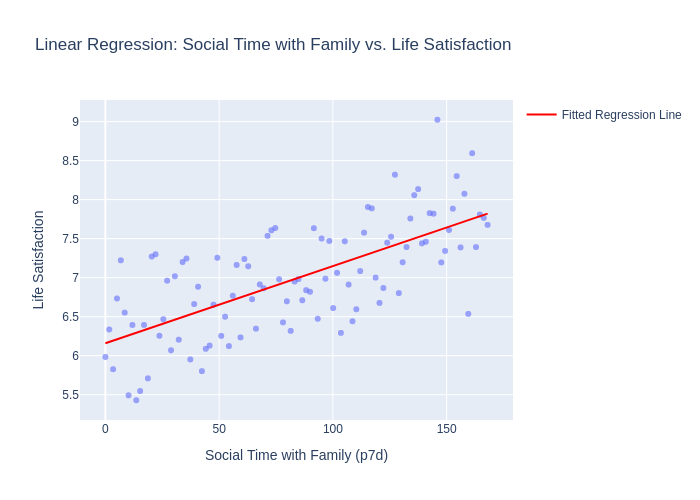

Intercept: 6.0947
Slope: 0.0110
R-squared: 0.4763

Synthetic Data Regression Coefficients:
Intercept: 6.1602
Slope: 0.0099


In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

df_clean = df[['CONNECTION_social_time_family_p7d', 'WELLNESS_life_satisfaction']].dropna()

X = sm.add_constant(df_clean['CONNECTION_social_time_family_p7d'])  
y = df_clean['WELLNESS_life_satisfaction']
model = sm.OLS(y, X).fit()

intercept = model.params['const']
slope = model.params['CONNECTION_social_time_family_p7d']

x_synthetic = np.linspace(df_clean['CONNECTION_social_time_family_p7d'].min(), 
                          df_clean['CONNECTION_social_time_family_p7d'].max(), 
                          100)
y_synthetic = intercept + slope * x_synthetic

noise = np.random.normal(0, 0.5, size=y_synthetic.shape) 
y_synthetic_noisy = y_synthetic + noise

synthetic_df = pd.DataFrame({
    'Social Time with Family (p7d)': x_synthetic,
    'Life Satisfaction': y_synthetic_noisy
})

fig = px.scatter(
    synthetic_df,
    x='Social Time with Family (p7d)',
    y='Life Satisfaction',
    title='Linear Regression: Social Time with Family vs. Life Satisfaction',
    labels={'Social Time with Family (p7d)': 'Social Time with Family (p7d)', 
            'Life Satisfaction': 'Life Satisfaction'},
    opacity=0.6
)

X_synthetic = sm.add_constant(synthetic_df['Social Time with Family (p7d)'])
y_synthetic = synthetic_df['Life Satisfaction']
model_synthetic = sm.OLS(y_synthetic, X_synthetic).fit()

y_fitted = model_synthetic.predict(X_synthetic)

fig.add_scatter(
    x=synthetic_df['Social Time with Family (p7d)'],
    y=y_fitted,
    mode='lines',
    name='Fitted Regression Line',
    line=dict(color='red')
)


fig.show(renderer = "png")

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
R_squared = model_synthetic.rsquared
print(f"R-squared: {R_squared:.4f}")

intercept_synthetic = model_synthetic.params['const']
slope_synthetic = model_synthetic.params['Social Time with Family (p7d)']

print("\nSynthetic Data Regression Coefficients:")
print(f"Intercept: {intercept_synthetic:.4f}")
print(f"Slope: {slope_synthetic:.4f}")

/tmp/ipykernel_52/485732517.py:7: DtypeWarning:

Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.



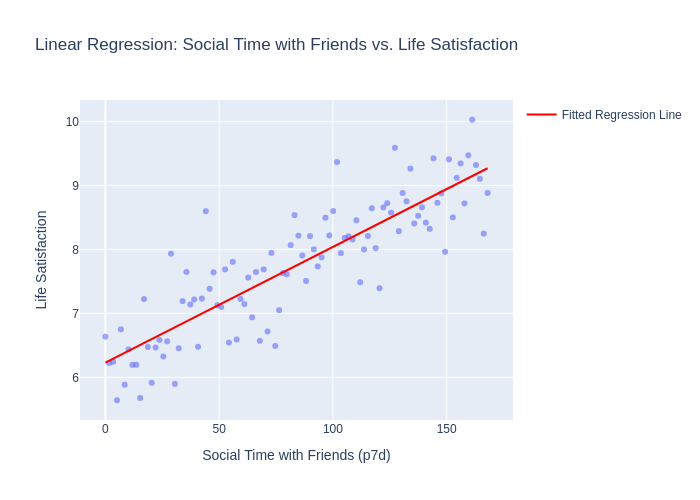

Intercept: 6.1006
Slope: 0.0195
R-squared: 0.7499


In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

df_clean = df[['CONNECTION_social_time_friends_p7d', 'WELLNESS_life_satisfaction']].dropna()

X = sm.add_constant(df_clean['CONNECTION_social_time_friends_p7d']) 
y = df_clean['WELLNESS_life_satisfaction']
model = sm.OLS(y, X).fit()

intercept = model.params['const']
slope = model.params['CONNECTION_social_time_friends_p7d']

x_synthetic = np.linspace(df_clean['CONNECTION_social_time_friends_p7d'].min(), 
                          df_clean['CONNECTION_social_time_friends_p7d'].max(), 
                          100)
y_synthetic = intercept + slope * x_synthetic

noise = np.random.normal(0, 0.5, size=y_synthetic.shape)  
y_synthetic_noisy = y_synthetic + noise

synthetic_df = pd.DataFrame({
    'Social Time with Friends (p7d)': x_synthetic,
    'Life Satisfaction': y_synthetic_noisy
})

fig = px.scatter(
    synthetic_df,
    x='Social Time with Friends (p7d)',
    y='Life Satisfaction',
    title='Linear Regression: Social Time with Friends vs. Life Satisfaction',
    labels={'Social Time with Friends (p7d)': 'Social Time with Friends (p7d)', 
            'Life Satisfaction': 'Life Satisfaction'},
    opacity=0.6
)

X_synthetic = sm.add_constant(synthetic_df['Social Time with Friends (p7d)'])
y_synthetic = synthetic_df['Life Satisfaction']
model_synthetic = sm.OLS(y_synthetic, X_synthetic).fit()

y_fitted = model_synthetic.predict(X_synthetic)

fig.add_scatter(
    x=synthetic_df['Social Time with Friends (p7d)'],
    y=y_fitted,
    mode='lines',
    name='Fitted Regression Line',
    line=dict(color='red')
)

fig.show(renderer = "png")

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
R_squared = model_synthetic.rsquared
print(f"R-squared: {R_squared:.4f}")